In [1]:
import pandas as pd

In [3]:
sa_df = pd.read_csv("data/simulated_annealing_results.csv")
sa_df

,Unnamed: 0,Seed,MatrixSize,InitTemp,CoolingRate,IterSpace,Path,Length,Time
0,0,1,10,1000,0.90,1000,"[2, 1, 9, 4, 3, 7, 6, 5, 8, 0]",58.0,0.003980
1,1,1,10,1000,0.90,3000,"[4, 3, 9, 1, 7, 6, 8, 5, 0, 2]",66.0,0.000558
2,2,1,10,1000,0.90,7000,"[2, 9, 1, 6, 5, 4, 3, 7, 0, 8]",66.0,0.000369
3,3,1,10,1000,0.90,10000,"[8, 3, 7, 4, 5, 9, 1, 2, 0, 6]",68.0,0.000469
4,4,1,10,1000,0.95,1000,"[2, 8, 5, 0, 7, 3, 6, 1, 9, 4]",64.0,0.003574
...,...,...,...,...,...,...,...,...,...
2371,2371,1435,20,2000,0.95,10000,"[19, 6, 3, 4, 13, 9, 14, 16, 17, 7, 10, 12, 18...",134.0,0.001277
2372,2372,1435,20,2000,0.99,1000,"[12, 14, 19, 8, 3, 0, 18, 17, 6, 11, 7, 10, 16...",105.0,0.004722
2373,2373,1435,20,2000,0.99,3000,"[8, 15, 17, 18, 9, 5, 6, 2, 1, 11, 7, 10, 3, 1...",97.0,0.014702
2374,2374,1435,20,2000,0.99,7000,"[3, 12, 6, 5, 13, 15, 9, 11, 0, 16, 17, 18, 4,...",88.0,0.032503


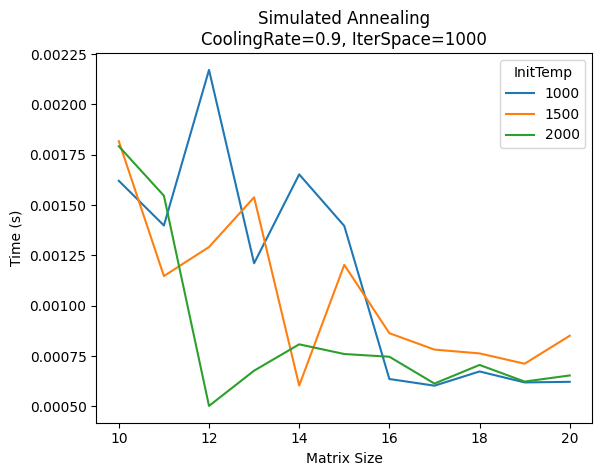

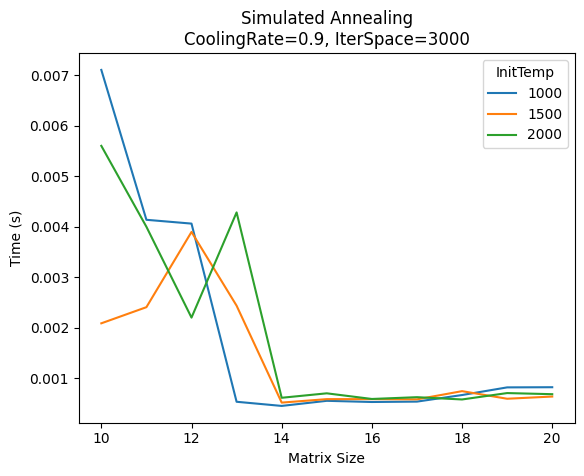

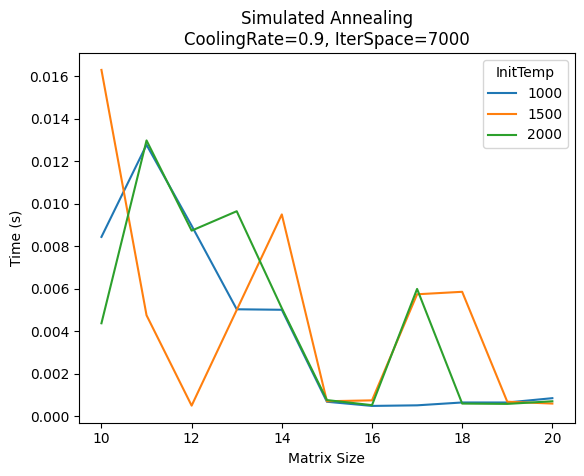

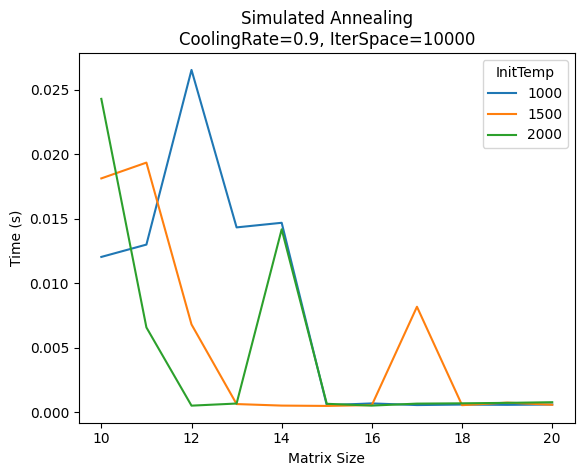

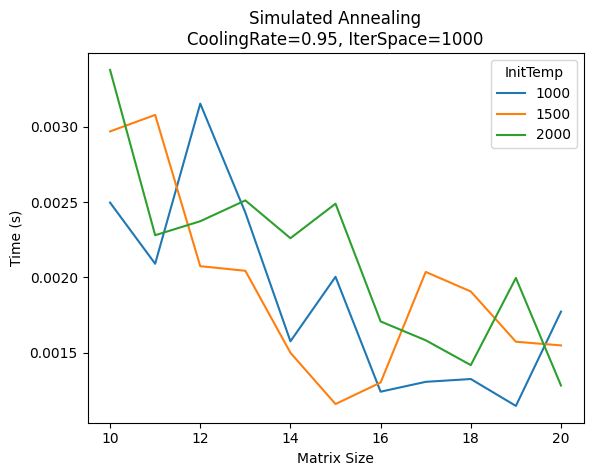

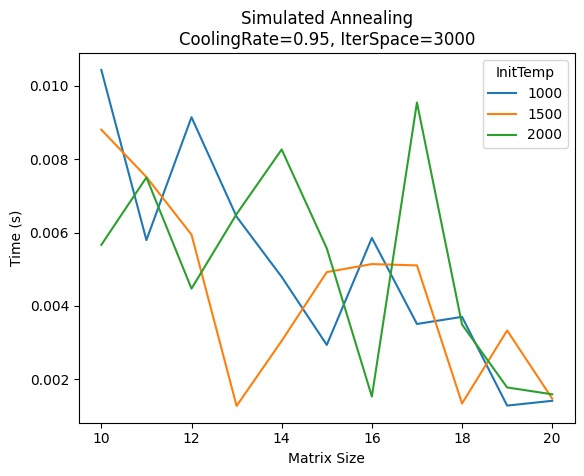

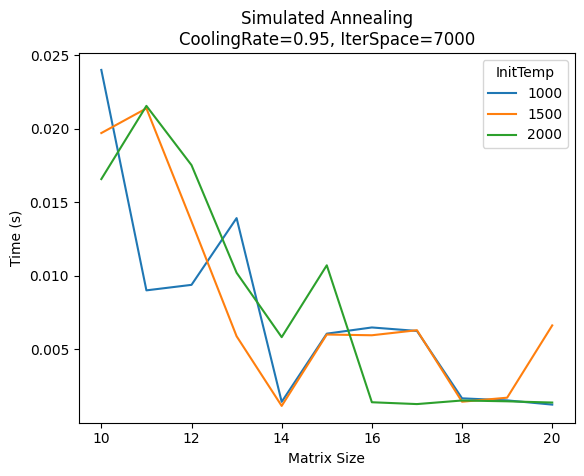

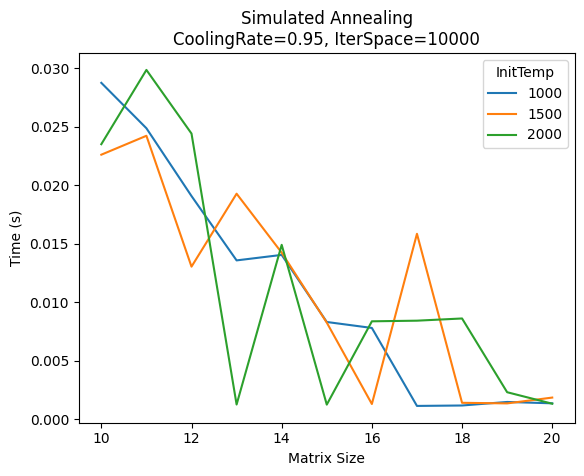

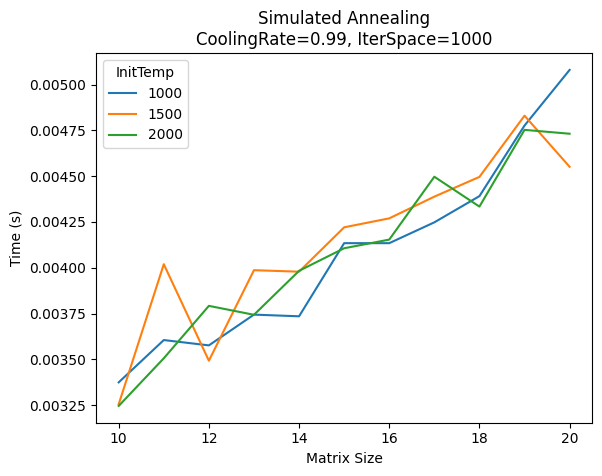

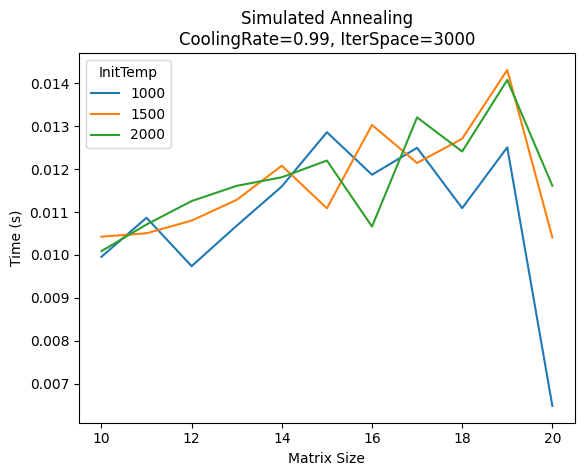

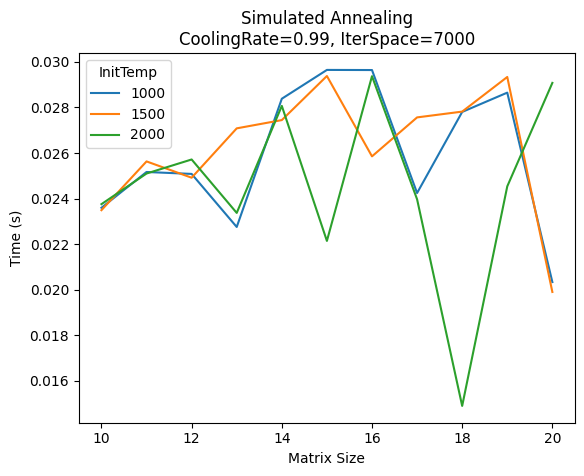

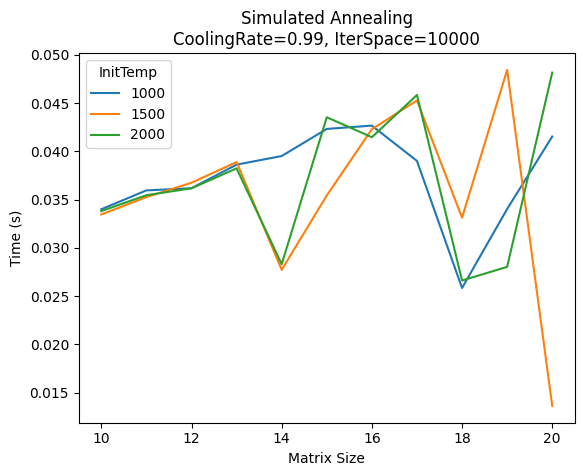

In [111]:
from matplotlib import pyplot as plt

for cooling_rate in sa_df.CoolingRate.unique():
    for iter_space in sa_df.IterSpace.unique():
        sa_df[(sa_df.CoolingRate == cooling_rate) & (sa_df.IterSpace == iter_space)].groupby(["MatrixSize", "InitTemp"]).Time.mean().unstack().plot()
        plt.title(f"Simulated Annealing\nCoolingRate={cooling_rate}, IterSpace={iter_space}")
        plt.gcf().axes[0].set_xlabel("Matrix Size")
        plt.gcf().axes[0].set_ylabel("Time (s)")
        plt.show()

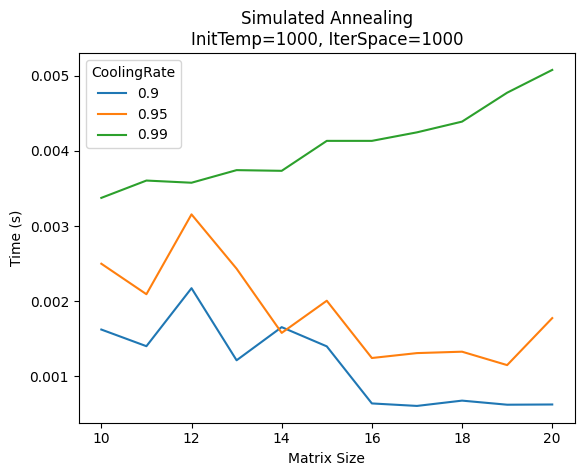

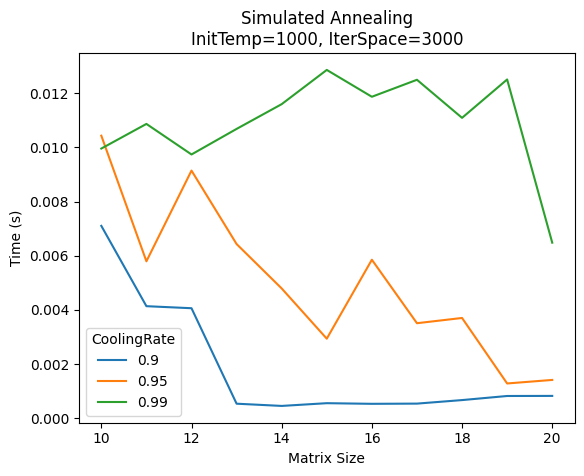

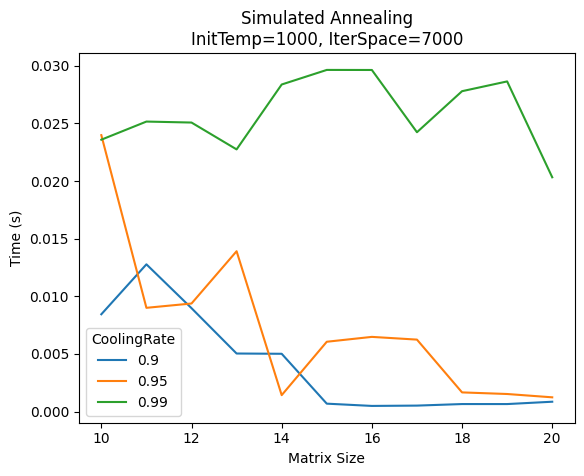

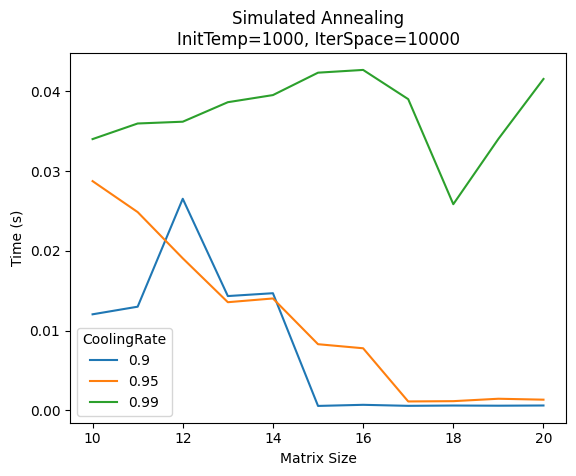

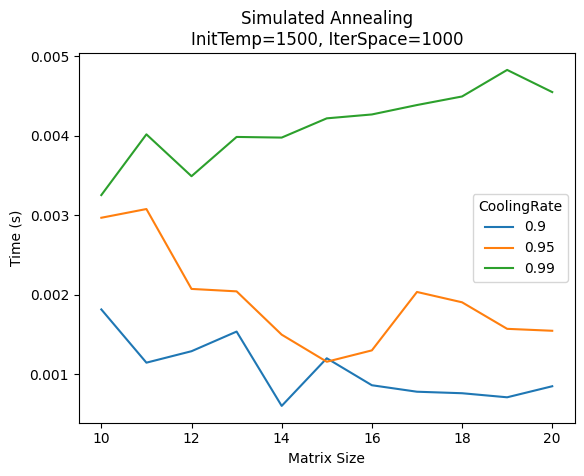

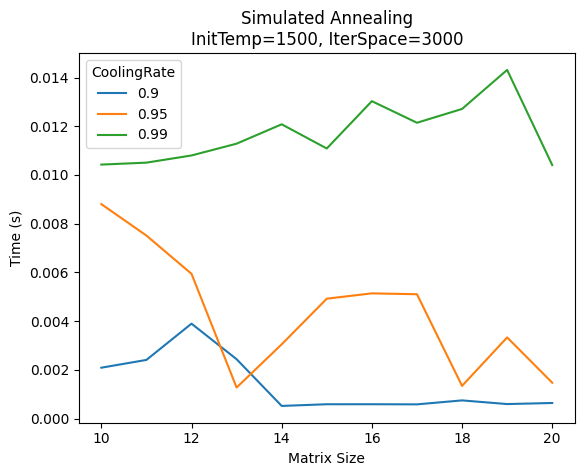

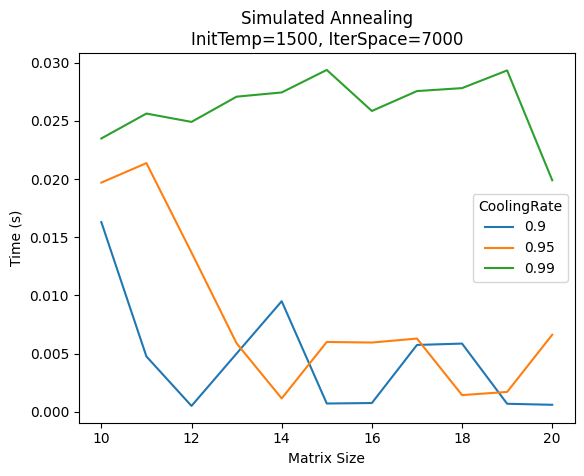

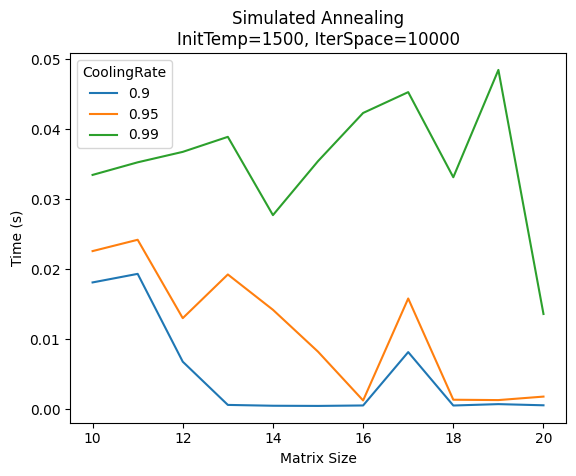

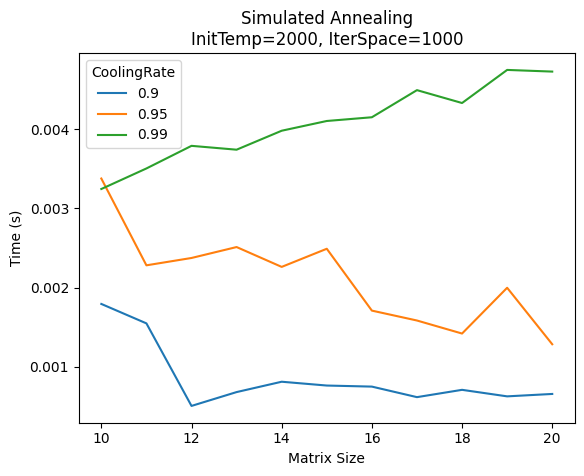

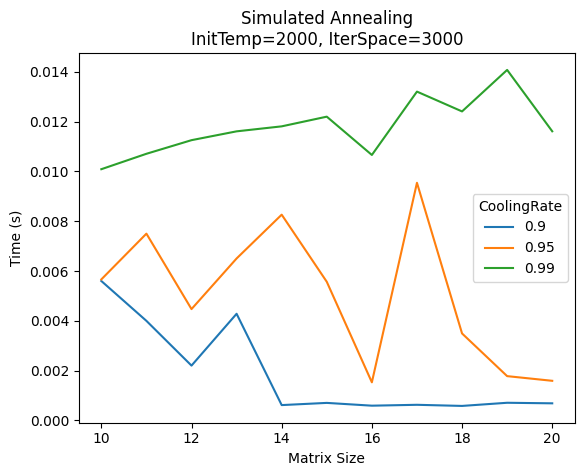

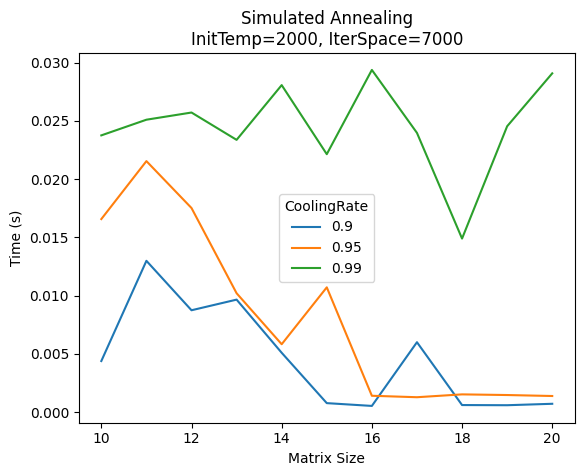

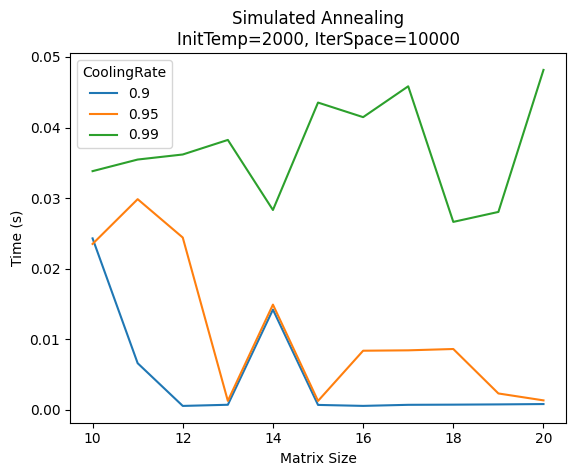

In [112]:
for init_temp in sa_df.InitTemp.unique():
    for iter_space in sa_df.IterSpace.unique():
        sa_df[(sa_df.InitTemp == init_temp) & (sa_df.IterSpace == iter_space)].groupby(["MatrixSize", "CoolingRate"]).Time.mean().unstack().plot()
        plt.title(f"Simulated Annealing\nInitTemp={init_temp}, IterSpace={iter_space}")
        plt.gcf().axes[0].set_xlabel("Matrix Size")
        plt.gcf().axes[0].set_ylabel("Time (s)")
        plt.show()

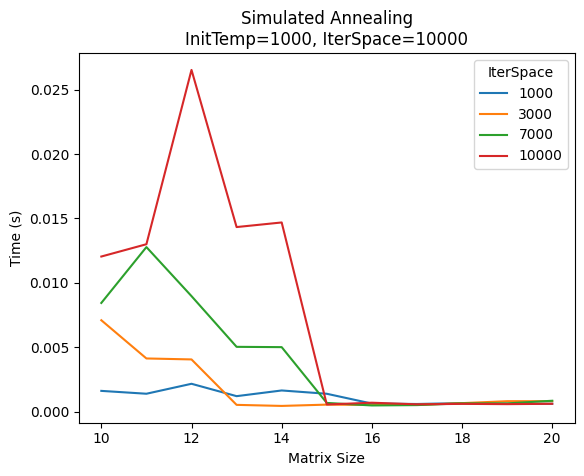

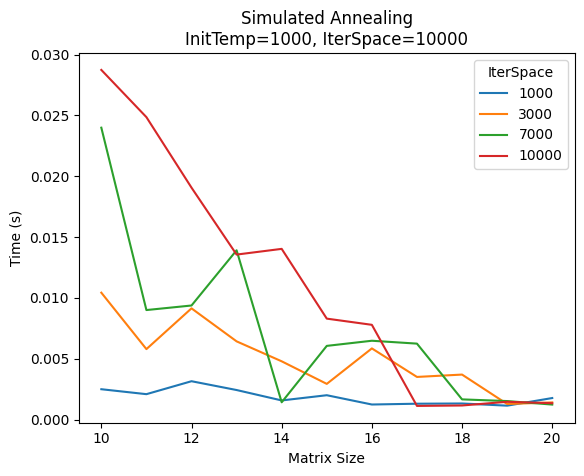

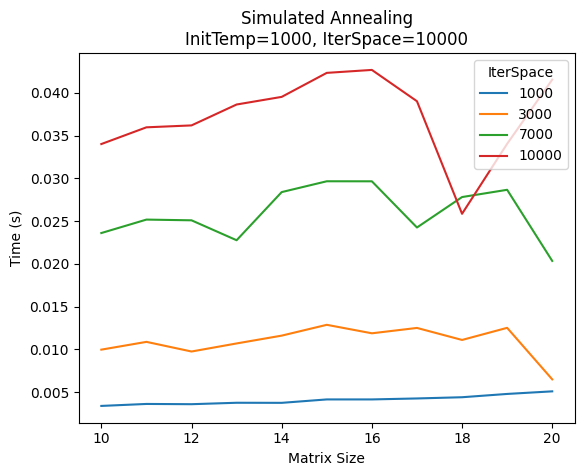

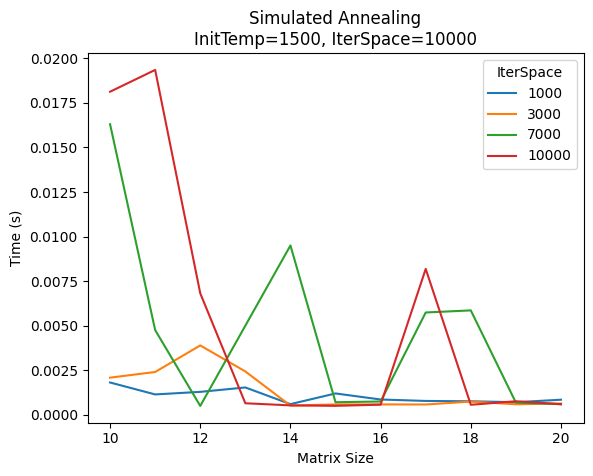

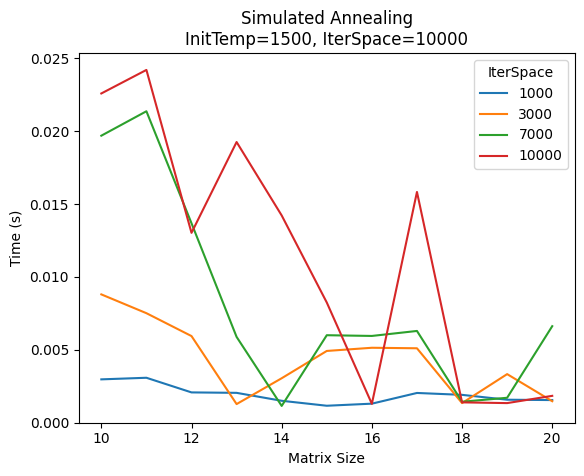

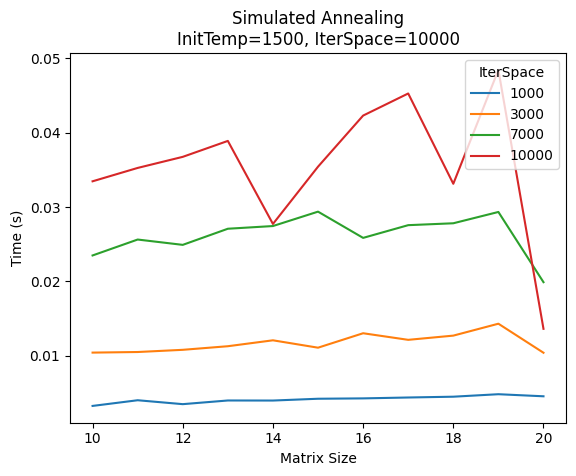

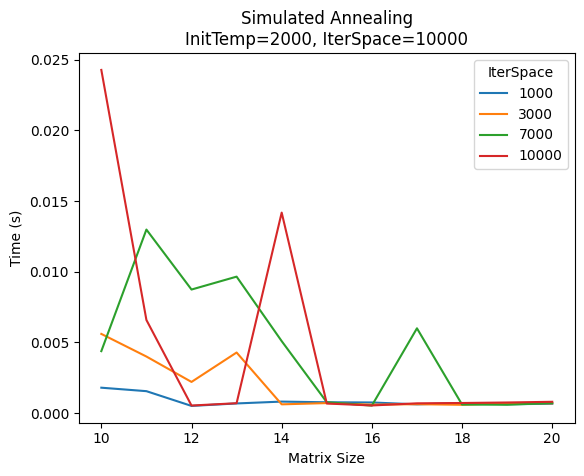

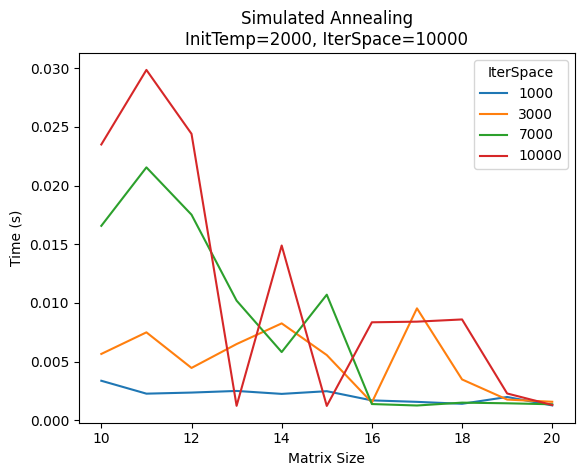

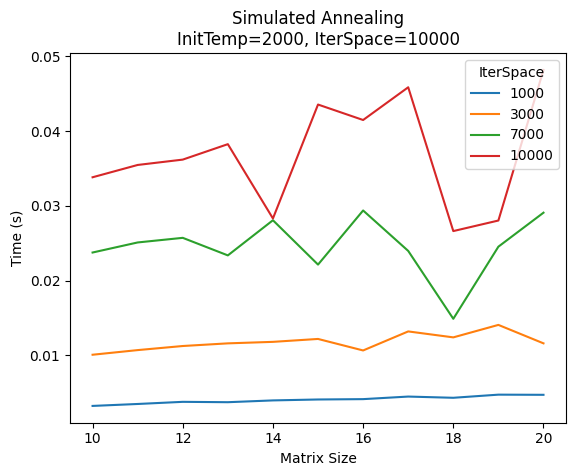

In [113]:
for init_temp in sa_df.InitTemp.unique():
    for cooling_rate in sa_df.CoolingRate.unique():
        sa_df[(sa_df.InitTemp == init_temp) & (sa_df.CoolingRate == cooling_rate)].groupby(["MatrixSize", "IterSpace"]).Time.mean().unstack().plot()
        plt.title(f"Simulated Annealing\nInitTemp={init_temp}, IterSpace={iter_space}")
        plt.gcf().axes[0].set_xlabel("Matrix Size")
        plt.gcf().axes[0].set_ylabel("Time (s)")
        plt.gcf().axes[0].legend(title="IterSpace", loc="upper right")
        plt.show()

In [2]:
ds_df = pd.read_csv("data/descending_search_results.csv")
ds_df

,Unnamed: 0,Seed,MatrixSize,IterSpace,Path,Length,Time
0,0,1,10,1000,"[6, 1, 9, 0, 2, 3, 7, 4, 5, 8]",48.0,0.001776
1,1,1,10,3000,"[4, 3, 7, 6, 5, 8, 0, 2, 1, 9]",43.0,0.004784
2,2,1,10,7000,"[7, 4, 3, 6, 5, 8, 2, 1, 9, 0]",56.0,0.011410
3,3,1,10,10000,"[1, 6, 8, 5, 4, 3, 7, 9, 0, 2]",67.0,0.015842
4,4,1,11,1000,"[0, 1, 8, 2, 9, 6, 10, 7, 5, 3, 4]",58.0,0.001859
...,...,...,...,...,...,...,...
259,259,1435,19,10000,"[3, 18, 13, 7, 16, 12, 0, 10, 6, 9, 15, 14, 2,...",99.0,0.031959
260,260,1435,20,1000,"[14, 2, 6, 1, 5, 18, 9, 16, 12, 0, 17, 8, 15, ...",157.0,0.003493
261,261,1435,20,3000,"[12, 17, 1, 15, 16, 13, 4, 14, 19, 7, 10, 3, 0...",94.0,0.010070
262,262,1435,20,7000,"[17, 18, 6, 5, 4, 14, 8, 15, 16, 13, 19, 10, 1...",87.0,0.022004


Text(0, 0.5, 'Time (s)')

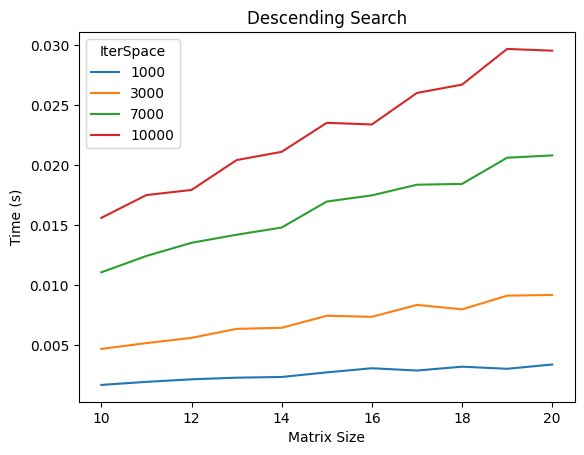

In [83]:
ds_df.groupby(["MatrixSize", "IterSpace"]).Time.mean().unstack().plot()
plt.title("Descending Search")
plt.gcf().axes[0].set_xlabel("Matrix Size")
plt.gcf().axes[0].set_ylabel("Time (s)")